<a href="https://colab.research.google.com/github/4graf/Data_Processing/blob/main/ML/%D0%93%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D0%B5_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
fi = pd.Series(data=(0.32, 0.95))
f = pd.DataFrame(
    {
        'X1' : [1, 1, -2],
        'X2' : [3, -2, -1]
    }
)
f.index = np.arange(1, 3+1)
f.index.name = 'Object'

z1_data = {}
# for i, row in zip(range(1, len(f.index)+1), f.itertuples(index=False)):
for i, row in enumerate(f.itertuples(index=False)):
    scalar_mult = sum(map(lambda x, y : x*y, row, fi))
    z1_data[i+1] = round(scalar_mult, 2)
    # print(round(scalar_mult, 2))

f['Z1'] = pd.Series(data=z1_data, name='Z1')

print(f)

        X1  X2    Z1
Object              
1        1   3  3.17
2        1  -2 -1.58
3       -2  -1 -1.59


In [ ]:
a = np.array([2, 3])
b = np.array([-3, 2])
print(np.dot(a, b))

ones_matrix = np.eye(a.size)
print(ones_matrix)

norm = np.linalg.norm(a)
print(list(map(lambda x: round(x, 2), a/norm)))
print(*(map(lambda x: round(x, 2), b/norm)))


0
[[1. 0.]
 [0. 1.]]
[0.55, 0.83]
-0.83 0.55


In [ ]:
print(2/15)

0.13333333333333333


**Нормализация!**

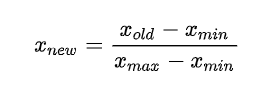

In [ ]:
# Нормализация 
X = f.loc[:, 'X1':'X2']
v_mean = X.mean()
X = X-v_mean
print(X, end='\n\n')
matrix_cov = np.cov(X, rowvar=False) # Переменные (признаки) в столбцах, а не в строках
print(matrix_cov, end='\n\n')
print(X.var(), end='\n\n')

eig_values, eig_vectors = np.linalg.eig(matrix_cov)
print(f'{eig_values=}\n{eig_vectors=}', end='\n\n')
# print(np.sqrt(eig_vectors[1][0]**2 + eig_vectors[1][1]**2))
# plt.plot(eig_vectors)
X_new = np.dot(X, -eig_vectors[:,1])
print(X_new)

print('X original =\n', X.loc[2])
print('X restored =\n', np.dot(X_new[1], -eig_vectors[:,1])+v_mean)




         X1   X2
Object          
1       1.0  3.0
2       1.0 -2.0
3      -2.0 -1.0

[[3.  1.5]
 [1.5 7. ]]

X1    3.0
X2    7.0
dtype: float64

eig_values=array([2.5, 7.5])
eig_vectors=array([[-0.9486833 , -0.31622777],
       [ 0.31622777, -0.9486833 ]])

[ 3.16227766 -1.58113883 -1.58113883]
X original =
 X1    1.0
X2   -2.0
Name: 2, dtype: float64
X restored =
 X1   -0.5
X2   -1.5
dtype: float64


In [ ]:
plt.scatter(f.X1, f.X2)

plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

In [ ]:
Z1 = np.array([3.17, -1.58, -1.59])
fi1 = np.array([0.32, 0.95])

print([np.dot(z, fi1.T) for z in Z1])


[array([1.0144, 3.0115]), array([-0.5056, -1.501 ]), array([-0.5088, -1.5105])]


# SKLEARN

In [ ]:
! head -5 49_25.csv

8.696454044611822809e+00,8.806511185561955557e+00,2.186314306480774050e+01,4.765461026899723507e+00,-8.010448233461943346e+00,-1.769030323369205071e+00,1.894840253380107598e+01,-1.314173781769121874e+01,-1.013611245515744308e+01,-2.160417884908799735e+01
9.435582225690231084e+00,1.042322953009039921e+01,2.126504872893275788e+01,4.957357147232182015e+00,-7.422432033347941882e+00,-2.966881736125469793e+00,2.034245281518345294e+01,-1.301521221788750537e+01,-1.012764213467030494e+01,-2.130842475866629115e+01
9.085047279491243799e+00,1.131883804501665836e+01,2.249631511502978753e+01,5.148429397453211820e+00,-5.248281430294944094e+00,-5.460962678200279363e+00,2.065243513546736764e+01,-1.197008237165443667e+01,-7.785082893161602513e+00,-2.020238583220560002e+01
-1.289857225442553279e+01,2.149605575017793058e+01,1.665668037192365958e+01,6.630722910329705400e+00,2.611521392094761040e+01,2.297237978473280151e+01,1.643298312895263891e+01,2.119925295147713129e+01,7.331390737763841869e+00,-5.667718

In [ ]:
df = pd.read_csv('49_25.csv', sep=',', header=None)
# display(df)
# df.head()
# scaler = StandardScaler()
# x = scaler.fit_transform(df)

print(df.shape)

pca = PCA(svd_solver='full')
pca.fit(df)
print(f'{pca.explained_variance_ratio_=}\n{pca.explained_variance_=}\n{pca.singular_values_=}')
pca.transform(df)[0]

(60, 10)
pca.explained_variance_ratio_=array([0.39906129, 0.32893912, 0.18788053, 0.07677308, 0.00204686,
       0.00156089, 0.00131508, 0.00093292, 0.00087408, 0.00061616])
pca.explained_variance_=array([666.13170518, 549.08051794, 313.61893927, 128.15319904,
         3.41671342,   2.60550469,   2.19519091,   1.55727131,
         1.45904974,   1.0285174 ])
pca.singular_values_=array([198.24674173, 179.98819561, 136.02763476,  86.95423361,
        14.1981017 ,  12.39857964,  11.38052124,   9.58535378,
         9.27814285,   7.78989901])


array([ -3.57879876, -23.18920982,   2.96786311,  18.45429531,
        -1.63660206,   0.197481  ,  -0.35112549,   1.05750746,
        -0.81267577,  -0.61733241])

pca.explained_variance_ratio_=array([0.39906129, 0.32893912])
pca.explained_variance_=array([666.13170518, 549.08051794])
pca.singular_values_=array([198.24674173, 179.98819561])
0.7280004144603317


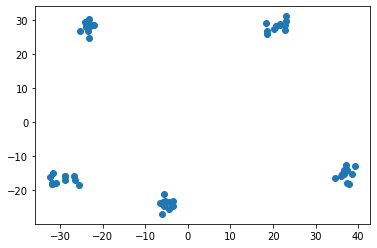

In [ ]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
print(f'{pca.explained_variance_ratio_=}\n{pca.explained_variance_=}\n{pca.singular_values_=}')
print(sum(pca.explained_variance_ratio_))

x_new = pca.transform(df)
plt.scatter(x_new[:, 0], x_new[:, 1])



In [ ]:
pca = PCA(0.85, svd_solver='full')
pca.fit(df)
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))
pca.transform(df)[0]

3
0.9158809454741212


array([ -3.57879876, -23.18920982,   2.96786311])

In [ ]:
! head -5 X_reduced_792.csv
! echo
! head -5 X_loadings_792.csv

-4.015805527973519133e+02;9.958990131518648070e+01;-9.145517854087043474e+01;-1.210646767898599023e+02;3.670645582088958747e+01;-2.753687775426996165e+00;6.458641141050010859e+00;-2.553152024065674652e+00;-1.231753296834150024e+00;-5.070816929219813113e-02
-4.015805527973512312e+02;9.958990131518633859e+01;-9.145517854087044896e+01;-1.210646767898599876e+02;3.670645582088960879e+01;-2.753687775426990392e+00;6.458641141050033063e+00;-2.553152024065646675e+00;-1.231753296834156020e+00;-5.070816929219253838e-02
-4.015805527973521407e+02;9.958990131518665123e+01;-9.145517854087063370e+01;-1.210646767898603855e+02;3.670645582088960879e+01;-2.753687775426990836e+00;6.458641141050011747e+00;-2.553152024065663550e+00;-1.231753296834138700e+00;-5.070816929222743408e-02
-4.015805527973520839e+02;9.958990131518665123e+01;-9.145517854087052001e+01;-1.210646767898601581e+02;3.670645582088950931e+01;-2.753687775426977069e+00;6.458641141050016188e+00;-2.553152024065659997e+00;-1.231753296834151357e+0

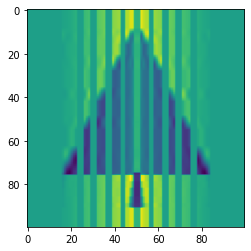

In [ ]:
x_reduce = pd.read_csv('X_reduced_792.csv', sep=';', header=None)
x_load = pd.read_csv('X_loadings_792.csv', sep=';', header=None)

x_orig = np.dot(x_reduce, x_load.T)
plt.imshow(x_orig)

(25.0, 204.55)

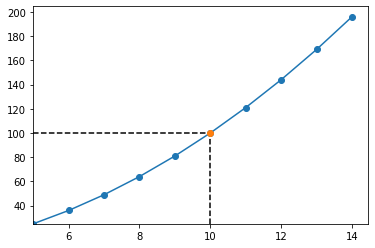

In [ ]:
x = np.arange(5, 15)
y = x**2
xp = x[-5]
yp = y[-5]

plt.plot(x, y, xp, yp, marker='o')

plt.vlines(xp, min(y), yp, linestyles='dashed')
plt.hlines(yp, min(x), xp, linestyles='dashed')

plt.xlim(min(x), None)
plt.ylim(min(y), None)